This script is written to get atmospheric data (pressure, temperature, etc.), as a function of altitude, from a local data file. The data is then plotted, and fit with a user-defined function

In [226]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False

In [227]:
# from office hours with Brash on 9/06 @6pm
def fitfunction(x,a,b):
    return a * (1-2*np.array(x)/b)

In [228]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

In [229]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
print(gravity) 

[9.807, 9.804, 9.801, 9.797, 9.794, 9.791, 9.788, 9.785, 9.782, 9.779, 9.776, 9.761, 9.745, 9.73, 9.715, 9.684, 9.654, 9.624, 9.594, 9.564]


In [230]:
if use_errors:
    # create a list to hold the uncertainty in the gravity 
    # from office hours with Brash on 9/6 @ 6pm
    gravity_uncertainty = [0.001]*len(gravity)
else:
   gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

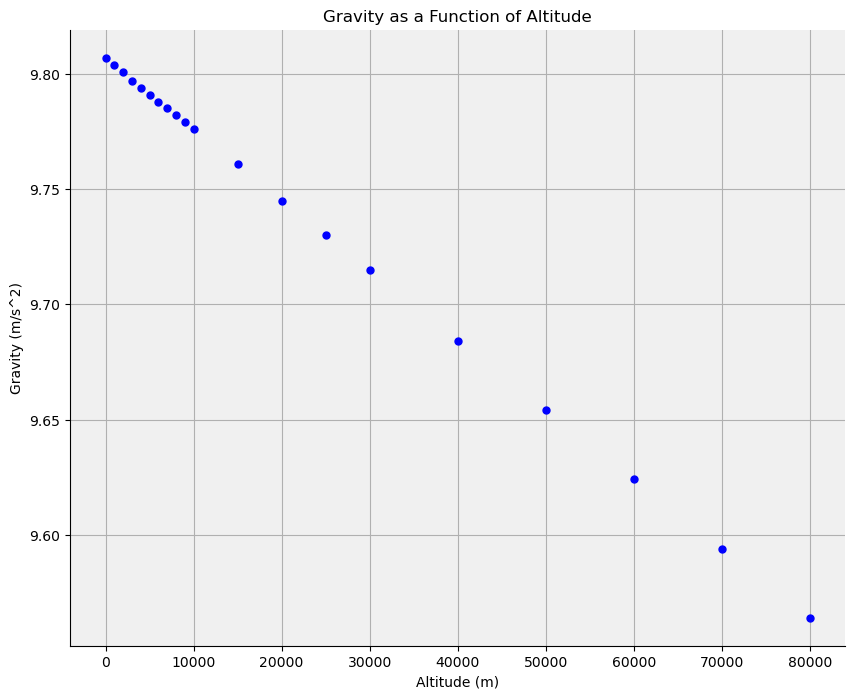

In [231]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")

In [232]:
from scipy.optimize import curve_fit

# OH RADIUS OF THE EARTH LOL GOT IT
init_vals = [9.8,6378000]

if not use_errors:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[9.80635969e+00 6.45444507e+06]
[[ 1.86774243e-08 -8.07514463e-01]
 [-8.07514463e-01  7.71928927e+07]]


In [233]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 3.632E-06 / 18


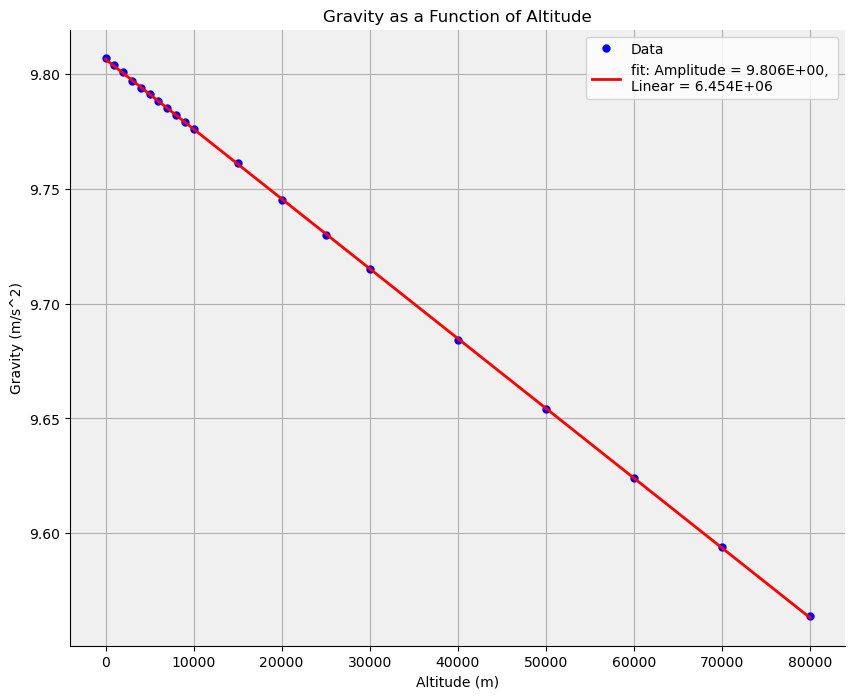

In [234]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()

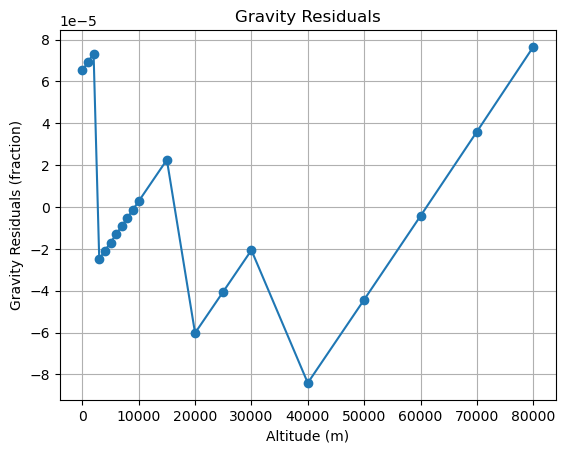

In [235]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

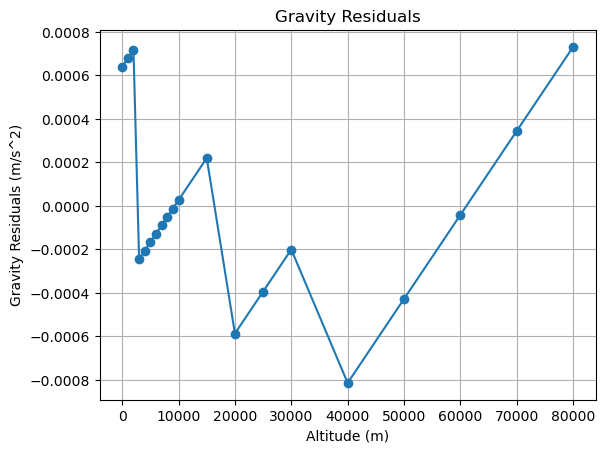

In [236]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [237]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h,i,j):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7) + i*np.power(np.array(x),8) + j*np.power(np.array(x),9)


In [238]:
if not use_errors:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True,
                           p0=init_vals)
print(popt)
print(pcov)

[ 8.97461283e-04 -5.27625391e-07  1.08755700e-10 -1.10787673e-14
  6.30706611e-19 -2.14860501e-23  4.46088540e-28 -5.51150332e-33
  3.71531234e-38 -1.05033419e-43]
[[ 6.51518142e-08 -4.94581979e-11  1.20520069e-14 -1.36116818e-18
   8.33644688e-23 -2.98565372e-27  6.42246816e-32 -8.15525905e-37
   5.62508717e-42 -1.62286253e-47]
 [-4.94581979e-11  6.39510463e-14 -1.89221673e-17  2.36762943e-21
  -1.54382048e-25  5.76486077e-30 -1.27716278e-34  1.65725000e-39
  -1.16200947e-44  3.39544614e-50]
 [ 1.20520069e-14 -1.89221673e-17  6.09812110e-21 -8.04133257e-25
   5.42865452e-29 -2.07688209e-33  4.68304460e-38 -6.15777118e-43
   4.36191418e-48 -1.28483454e-53]
 [-1.36116818e-18  2.36762943e-21 -8.04133257e-25  1.09949455e-28
  -7.61275989e-33  2.96606869e-37 -6.77938588e-42  9.00715571e-47
  -6.43213667e-52  1.90684864e-57]
 [ 8.33644688e-23 -1.54382048e-25  5.42865452e-29 -7.61275989e-33
   5.36812655e-37 -2.12000989e-41  4.89574693e-46 -6.55687251e-51
   4.71218751e-56 -1.40411186e-61]
 

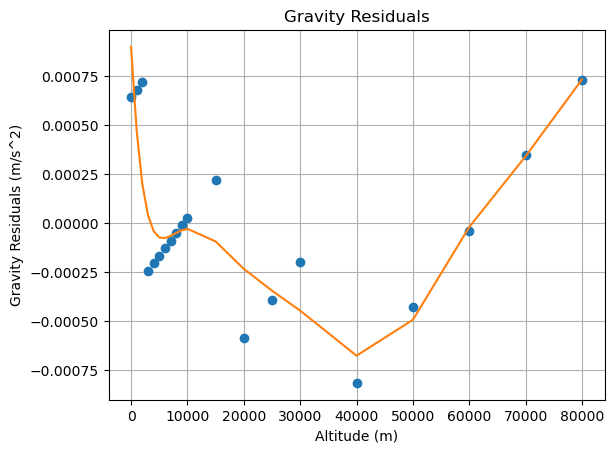

In [239]:

plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [240]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],
                 popt[6], popt[7], popt[8], popt[9]]



In [241]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h,i,j):
    return a0*(1+np.array(x)/a1)**(-2)+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)+i*np.power(np.array(x),8)+j*np.power(np.array(x),9)


In [242]:
init_vals = popt_combined
if not use_errors:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True,
                           p0=init_vals)

print(popt, pcov)


[ 9.84564796e+00  6.25372551e+06 -3.83904458e-02 -4.17863956e-07
  1.08060894e-10 -1.10824350e-14  6.30803920e-19 -2.14867375e-23
  4.46080185e-28 -5.51143363e-33  3.71543556e-38 -1.05044397e-43] [[ 4.74636670e+07  2.20371672e+13 -4.74637243e+07  4.08316812e+00
   2.09566078e-06 -9.29374011e-11  9.25142365e-15 -4.89963707e-19
   1.45675999e-23 -2.43705515e-28  2.13489858e-33 -7.59137686e-39]
 [ 2.20371672e+13  1.15137690e+19 -2.20371938e+13  1.25026574e+06
   1.29727127e+00 -4.47788104e-05  4.38457647e-09 -2.30673741e-13
   6.83487629e-18 -1.14114806e-22  9.98383916e-28 -3.54693801e-33]
 [-4.74637243e+07 -2.20371938e+13  4.74637816e+07 -4.08317307e+00
  -2.09566328e-06  9.29375115e-11 -9.25143471e-15  4.89964294e-19
  -1.45676174e-23  2.43705809e-28 -2.13490115e-33  7.59138601e-39]
 [ 4.08316812e+00  1.25026574e+06 -4.08317307e+00  6.76307752e-07
   1.69829690e-14 -7.17224280e-18  7.50775545e-22 -4.05388732e-26
   1.21719676e-30 -2.04781244e-35  1.80039575e-40 -6.41796101e-46]
 [ 2.095

Chi^2 / dof = 8.140E-07 / 8


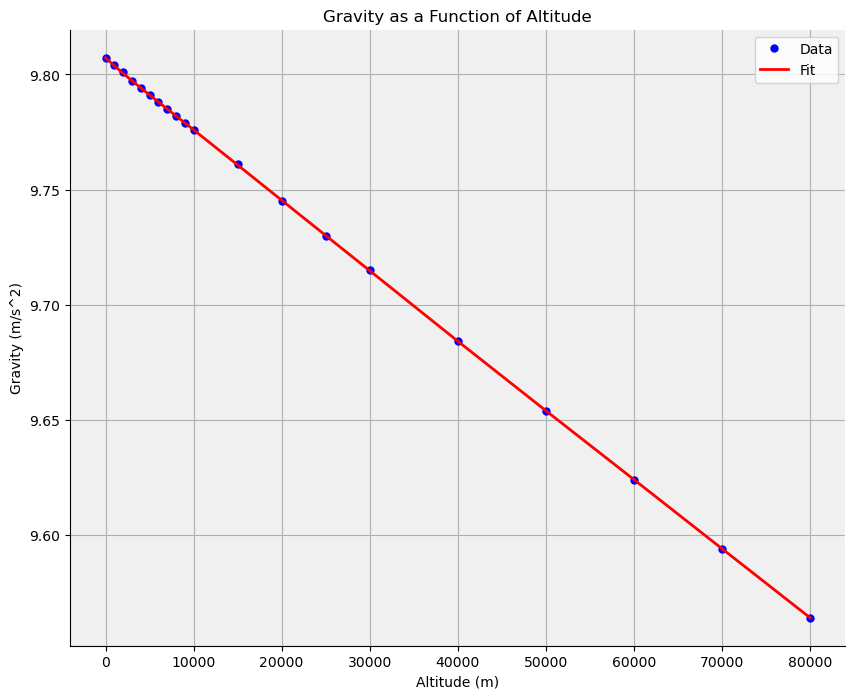

In [243]:

yfit = []
chi2 = 0
for i in range(0, npoints):
    yfit.append(fitfunction_combined(altitude[i], *popt))
    chi2 += (gravity[i] - yfit[i]) * (gravity[i] - yfit[i])

print("Chi^2 / dof = %.3E / %d" % (chi2, npoints - len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude, np.abs(yfit), color='r', linewidth=2, label="Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()